In [1]:
import pandas as pd 
import os 
from skimage.transform import resize 
from skimage.io import imread 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import svm 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
Categories=['White Cats', 'Black Cats'] 
flat_data_arr=[] #input array 
target_arr=[] #output array 
datadir= "C:/Users/User/Documents/DSS 740/Cat Images"
#path which contains all the categories of images 
for i in Categories:       
    path=os.path.join(datadir,i) 
    for img in os.listdir(path): 
        img_array=imread(os.path.join(path,img)) 
        img_resized=resize(img_array,(150,150,3)) 
        flat_data_arr.append(img_resized.flatten()) 
        target_arr.append(Categories.index(i)) 
flat_data=np.array(flat_data_arr) 
target=np.array(target_arr)

In [3]:
df=pd.DataFrame(flat_data)  
df['Target']=target 
df.shape

(126, 67501)

In [4]:
df = df.sample(frac=1)
df = df.reset_index(drop=True)
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.286889,0.311885,0.326753,0.293455,0.313999,0.332283,0.301957,0.316216,0.329025,0.294630,...,0.165556,0.147545,0.133514,0.153784,0.147164,0.128129,0.152231,0.141411,0.127600,0
1,0.174467,0.252447,0.185231,0.120870,0.193183,0.113188,0.156395,0.254668,0.132296,0.171278,...,0.190648,0.162162,0.189484,0.185740,0.163389,0.177047,0.206136,0.212933,0.169179,0
2,0.469232,0.549799,0.592024,0.462166,0.532308,0.566909,0.468250,0.528987,0.546003,0.455077,...,0.516393,0.690775,0.588115,0.583115,0.696781,0.594053,0.500303,0.593339,0.459584,1
3,0.228225,0.203239,0.128688,0.261063,0.224912,0.145351,0.268145,0.231302,0.143762,0.272814,...,0.322555,0.265135,0.208253,0.358437,0.270964,0.209189,0.349871,0.277841,0.203526,0
4,0.794241,0.785891,0.765295,0.785896,0.783132,0.761851,0.781353,0.776581,0.753982,0.793538,...,0.608340,0.579429,0.551487,0.598732,0.575058,0.546748,0.616994,0.597684,0.560595,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.402409,0.402409,0.394566,0.271598,0.271598,0.263755,0.267953,0.267953,0.260110,0.263725,...,0.438923,0.442825,0.423277,0.440467,0.442532,0.434989,0.432734,0.436616,0.452927,0
122,0.302260,0.313820,0.340206,0.311235,0.324593,0.352128,0.326957,0.334343,0.356176,0.320833,...,0.014662,0.014662,0.014662,0.012136,0.012136,0.012136,0.010456,0.010456,0.010456,1
123,0.407951,0.392265,0.388343,0.418814,0.403127,0.399112,0.427503,0.411296,0.407112,0.438511,...,0.897724,0.913109,0.917129,0.896937,0.910768,0.908176,0.890818,0.897629,0.894326,1
124,0.342607,0.363993,0.308463,0.328159,0.349136,0.294505,0.312810,0.332249,0.286557,0.293346,...,0.438435,0.513132,0.587396,0.428502,0.514534,0.566725,0.436714,0.503289,0.571618,1


In [5]:
#input data  
x=df.iloc[:,:-1]  
#output data 
y=df.iloc[:,-1]

In [6]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33, random_state=0) 

In [7]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

84
42
84
42


In [8]:
model = svm.SVC(probability=True)

In [9]:
model.fit(X_train, y_train)

SVC(probability=True)

In [10]:
y_pred = model.predict(X_test)

In [11]:
accuracy = accuracy_score(y_pred, y_test)
print(f"The model is {accuracy*100}% accurate")

The model is 97.61904761904762% accurate


In [12]:
print(classification_report(y_test, y_pred, target_names=['white cat', 'black cat']))

              precision    recall  f1-score   support

   white cat       0.96      1.00      0.98        23
   black cat       1.00      0.95      0.97        19

    accuracy                           0.98        42
   macro avg       0.98      0.97      0.98        42
weighted avg       0.98      0.98      0.98        42



In [13]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [14]:
model1.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_pred = model1.predict(X_test)

In [16]:
accuracy = accuracy_score(y_pred, y_test)
print(f"The model is {accuracy*100}% accurate")

The model is 97.61904761904762% accurate


In [17]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)

In [18]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [19]:
y_pred = tree.predict(X_test)

In [20]:
accuracy = accuracy_score(y_pred, y_test)
print(f"The model is {accuracy*100}% accurate")

The model is 80.95238095238095% accurate


In [21]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [22]:
y_pred = tree.predict(X_test)

In [23]:
accuracy = accuracy_score(y_pred, y_test)
print(f"The model is {accuracy*100}% accurate")

The model is 80.95238095238095% accurate


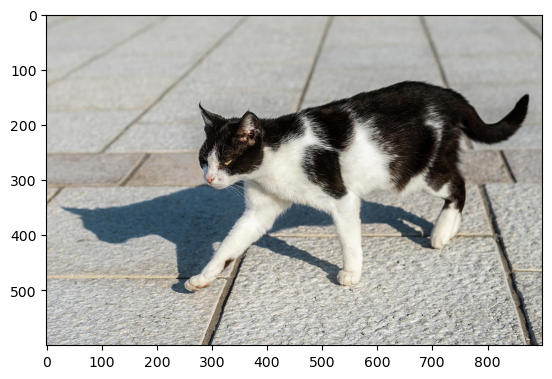

White Cats = 63.02179429877272%
Black Cats = 36.97820570122728%
The predicted image is : White Cats


In [24]:
path="C:/Users/User/Documents/DSS 680/Cat Images Test/test1.jpg"
img=imread(path) 
plt.imshow(img) 
plt.show() 
img_resize=resize(img,(150,150,3)) 
l=[img_resize.flatten()] 
probability=model.predict_proba(l) 
for ind,val in enumerate(Categories): 
    print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+Categories[model.predict(l)[0]])

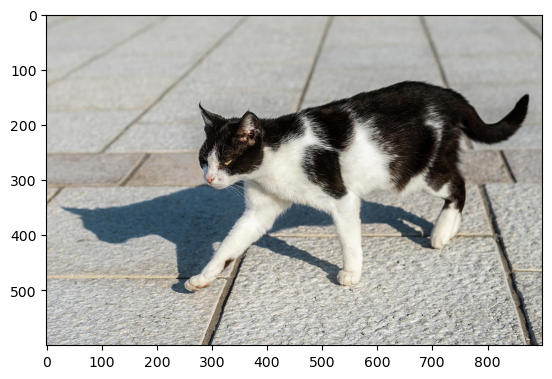

White Cats = 36.80205697841675%
Black Cats = 63.19794302158325%
The predicted image is : Black Cats


In [25]:
path="C:/Users/User/Documents/DSS 680/Cat Images Test/test1.jpg"
img=imread(path) 
plt.imshow(img) 
plt.show() 
img_resize=resize(img,(150,150,3)) 
l=[img_resize.flatten()] 
probability=model1.predict_proba(l) 
for ind,val in enumerate(Categories): 
    print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+Categories[model1.predict(l)[0]])

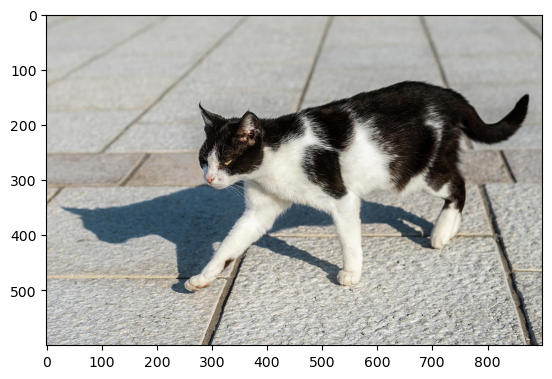

White Cats = 36.80205697841675%
Black Cats = 63.19794302158325%
The predicted image is : White Cats


In [26]:
path="C:/Users/User/Documents/DSS 680/Cat Images Test/test1.jpg"
img=imread(path) 
plt.imshow(img) 
plt.show() 
img_resize=resize(img,(150,150,3)) 
l=[img_resize.flatten()] 
probability=model1.predict_proba(l) 
for ind,val in enumerate(Categories): 
    print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+Categories[tree.predict(l)[0]])

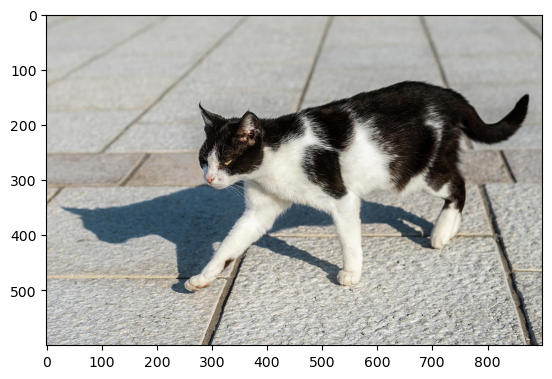

White Cats = 36.80205697841675%
Black Cats = 63.19794302158325%
The predicted image is : White Cats


In [27]:
path="C:/Users/User/Documents/DSS 680/Cat Images Test/test1.jpg"
img=imread(path) 
plt.imshow(img) 
plt.show() 
img_resize=resize(img,(150,150,3)) 
l=[img_resize.flatten()] 
probability=model1.predict_proba(l) 
for ind,val in enumerate(Categories): 
    print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+Categories[forest.predict(l)[0]])